In [1]:
# This code is to disable warnings that may display this notebook a little bit "ugly"
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.pipeline import Pipeline

import string

from sklearn.learning_curve import learning_curve

from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

from collections import Counter

import pickle

import sys

import random

%matplotlib inline

C:\Users\youne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\youne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## get the data

In [3]:
data =pd.read_csv('data_ful_cleard.csv',encoding='utf-8',delimiter=';',error_bad_lines=False)

## EDA

In [4]:
data.tail(2)

,text,label
116291,عجبتني خصيتان كي تجةنكةل بل أنجليس,tunisien
116292,طفل ظامر برشة ربي يوفقو,tunisien


In [5]:
data.head(2)

,text,label
0,اتمنى من الاداره الهلاليه تنبه لمشكلتين في اله...,gulf
1,الة اكبر ما خلو علينا اشي وبحكو ليش بنهاجر وبن...,levantine


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 2 columns):
text     116292 non-null object
label    116293 non-null object
dtypes: object(2)
memory usage: 1.8+ MB


## data cleaning

In [8]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [ ]:
print(arb_stopwords)

In [10]:
def delete_stop_words(mess):
    
    # Now just remove any stopwords
    stop_words = set(nltk.corpus.stopwords.words("arabic"))
    
    return ' '.join(word for word in mess.split() if word not in stop_words and len(word)>1)

In [ ]:
data['text'] = data['text'].apply(delete_stop_words)

In [9]:
data = data[data["label"].isin(['gulf', 'levantine', 'general', 'egyptian', 'iraqi','maghrebi', 'tunisien'])]
data.groupby('label').describe()

text                                                            \
           count unique                                                top   
label                                                                        
egyptian   22105  22105  وبترجيت نثتغيث وداخلها ولاسباب الارتفاع المشد ...   
general    18903  18903              مقبلة نفسد عبيكم خبرتها ولأكون لجزائر   
gulf       24171  24171    لو احد من القضاة فرقوا بينه وبين عياله وش بيسوي   
iraqi        291    291  وما نتمناه مكراً هو أن نصرف أكثر لبناء شؤونا و...   
levantine  22987  22987  بلعيبه تركو افلل مشاريعيك هالجيل بالسعودية وحر...   
maghrebi    9638   9638  الشكاوي هتتةوووتuنiسiaسaتcoمثبفoرuمدiسةلaيةهةف...   
tunisien   16999  16999                                         عجبني بريف   

                
          freq  
label           
egyptian     1  
general      1  
gulf         1  
iraqi        1  
levantine    1  
maghrebi     1  
tunisien     1

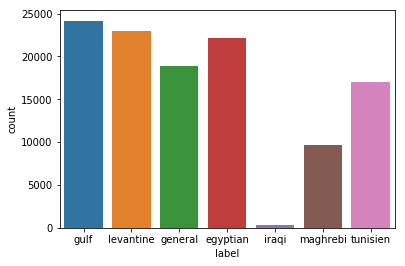

In [10]:
sns.countplot(x="label", data=data)

## dialect classification 

In [11]:
X = data.text
y = data.label

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80565,) (34529,) (80565,) (34529,)


### using naive bayes classification model
#### use pipeline to pipeline the process: convert words to numbers then tfidf to give importance for each word then train the model
#### use pickle to save the model as a file

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initializing Pipline
pipelineNB = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors
])

# Training the model
pipelineNB.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineNB1.pickle', 'wb') as handle:
    pickle.dump(pipelineNB, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Predictions
predictionsNB = pipelineNB.predict(X_test)

# Model Evaluation
print(classification_report(predictionsNB, y_test))

             precision    recall  f1-score   support

   egyptian       0.87      0.69      0.77      8247
    general       0.26      0.90      0.41      1680
       gulf       0.84      0.60      0.70     10045
      iraqi       0.00      0.00      0.00         0
  levantine       0.77      0.59      0.67      9127
   maghrebi       0.22      0.99      0.36       633
   tunisien       0.88      0.93      0.90      4797

avg / total       0.79      0.69      0.72     34529



In [16]:
with open('pipelineNB1.pickle', 'rb') as handle:
    NB = pickle.load(handle)
NB.predict(["شكون حالك"])[0]

'tunisien'

In [17]:
NB.predict(["هوا في ايه"])[0]


'egyptian'

In [18]:
NB.predict(["انا عاوز أوجه تحيه للدوله العميقه اللى كل يوم بتثبت ان البلد دى فيها رجاله عارفه بتعمل ايه فعلا و امتى و ازاى ، فى اسبوعي…"])[0]

'egyptian'

In [19]:
NB.predict(["انا خوش مشتاقلك"])[0]

'gulf'

In [20]:
NB.predict(["إلا لا و على دارهم و شنوة تقصد بيها الكلمة باش تقراو "])[0]

'maghrebi'

In [21]:
NB.predict(["انا خوش مشتاقلك"])[0]

'gulf'

In [22]:
NB.predict(["يولد جميع الناس أحرارا ومتساوين في الكرامة والحقوق. وهم قد وهبوا العقل والوجدان وعليهم أن"])[0]

'general'

### cross validation

In [23]:
%time scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresNB))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresNB.mean(), scoresNB.std()))
scoresNB = scoresNB.mean()

Wall time: 46.3 s
Cross-validation scores: [0.67678084 0.68544834 0.6854093  0.68102539 0.67641217]
Average cross-validation score: 0.68 +/- 0.00


#### learining curve

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    This function is to generate a simple plot of the test and traning learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Wall time: 1min 35s


<module 'matplotlib.pyplot' from 'C:\\Users\\youne\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

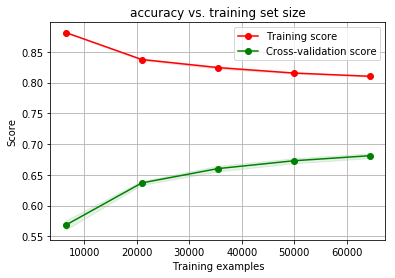

In [25]:
%time plot_learning_curve(pipelineNB, "accuracy vs. training set size", X_train, y_train, cv=5)

In [26]:
data.to_csv("data_ful_cleard.csv", sep=';', encoding='utf-8',index=False)